<a href="https://colab.research.google.com/github/CodeJaymes/Machine-Learn/blob/main/Diabetes_Prediction_using_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies for data procesing and model 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Data Collection & Preprocessing 
#PIMA Diabetes Dataset 

#Load the data into a pandas dataframe 
df =  pd.read_csv('/content/diabetes.csv')



In [ ]:
#Understand the dataset by visualing the properties of the dataset 
df.shape
df.info
df.describe

#The dataset has 738 rows and 9 columns of which the last column is the one which we need to predict 

<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Review the target variables column 

df['Outcome'].value_counts()

#There are no missing  values 

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Splitting the dataset into features & targets 

x = df.drop(columns = ['Outcome'], axis = 1)
# x is a collection of all features in the dataset[L-R] that will be used to ascertain the result

y = df['Outcome']


x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2, stratify = y)

classifier =  SVC(kernel='linear')

steps =  [ 
           ('scaler',StandardScaler()),
           ('classifier', classifier)
         ]

pipe = Pipeline(steps)

y_predict = pipe.fit(x_train,y_train)




In [ ]:
#Evaluate the accuracy of our model on the training data 
y_compare =  pipe.predict(x_train)

#Evaluate the accuracy of our model on the test data
y_result =  pipe.predict(x_test)

#Printing the accuracy score of the the model on the training data 
accuracy =  accuracy_score(y_train,y_compare)
print('The accuracy score on the training data is :', accuracy)

#Printing the accuracy score of the the model on the test data 
accuracy =  accuracy_score(y_test,y_result)
print('The accuracy score on the test data is :', accuracy)



The accuracy score on the training data is : 0.7866449511400652
The accuracy score on the training data is : 0.7727272727272727


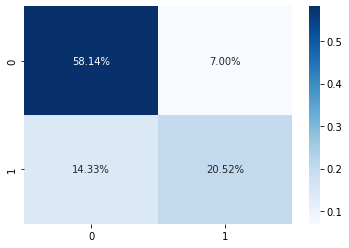

In [ ]:
#Visualizing the confusion matrix 
cf_matrix  = confusion_matrix(y_train, y_compare)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [34]:
#Building a Predictive System 

input_data = [1,103,30,38,83,43.3,0.183,33]

#Convert the data into a numpy array 
input_data_as_np_array =  np.asarray(input_data)

#Reshape the data 
rs_data  = (input_data_as_np_array).reshape(1,-1)

rs_result = pipe.predict(rs_data)




if (rs_result[0] == '1'):
 print('This patient is likely to have diabetes')
else:
 print ('This patient is diabetes free') 

This patient is diabetes free


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
